Desafio 3: Suplementos Alimentares 
  Dificuldade: Média. 
 
Imagine que você trabalha em uma empresa que fabrica suplementos 
alimentares. O time de produtos quer entender qual das três novas 
fórmulas de proteína em pó proporciona maior ganho de massa muscular 
em atletas. 
Foi realizada uma pesquisa com vários atletas e coletados os seguintes 
dados no arquivo desafio_03_suplementos.csv: 
●  id_produto: Código identificador do suplemento (Fórmula 1, 2 ou 3).  
●  id_atleta: Código identificador do atleta que participou do estudo.  
●  ganho_massa: Quantidade de massa muscular ganha (em kg) após 8 
semanas de uso.  
●  idade: Idade do atleta.  
●  frequencia_treino: Número médio de treinos semanais do atleta.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = ('https://raw.githubusercontent.com/CristianaMoura/Desafios_Equipe_DadosWomakersCode/refs/heads/master/Desafio_Hipotese/desafio_03_suplementos.csv')
df = pd.read_csv(url)

df.head(10)

HTTPError: HTTP Error 404: Not Found

In [ ]:
df.id_produto.replace()

C:\Users\Crist\AppData\Local\Temp\ipykernel_13904\4188759676.py:1: FutureWarning: Series.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  df.id_produto.replace()


0      Fórmula 3
1      Fórmula 1
2      Fórmula 3
3      Fórmula 3
4      Fórmula 1
         ...    
295    Fórmula 2
296    Fórmula 2
297    Fórmula 2
298    Fórmula 2
299    Fórmula 2
Name: id_produto, Length: 300, dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_produto         300 non-null    object 
 1   id_atleta          300 non-null    int64  
 2   ganho_massa        300 non-null    float64
 3   idade              300 non-null    int64  
 4   frequencia_treino  300 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 11.8+ KB


Questões a serem respondidas: 
1.  Faça uma análise exploratória dos dados: 
●  Qual é a média e a mediana do ganho de massa para cada 
suplemento? 
●  Como os dados estão distribuídos? Utilize histogramas e 
boxplots para visualizar as diferenças entre as fórmulas. 
●  Há outliers no ganho de massa muscular? O que isso pode 
indicar? 
 
 

In [ ]:
df.describe()

,id_atleta,ganho_massa,idade,frequencia_treino
count,300.000000,300.000000,300.000000,300.000000
mean,150.500000,2.466733,28.123333,3.993333
std,86.746758,1.436384,6.493742,1.430657
min,1.000000,0.030000,18.000000,2.000000
25%,75.750000,1.267500,22.000000,3.000000
50%,150.500000,2.400000,28.000000,4.000000
75%,225.250000,3.612500,34.000000,5.000000
max,300.000000,4.980000,39.000000,6.000000


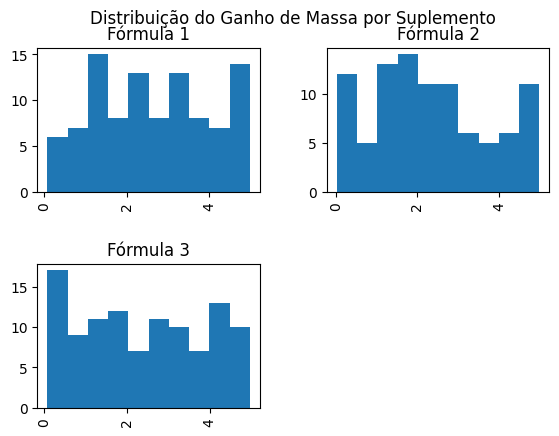

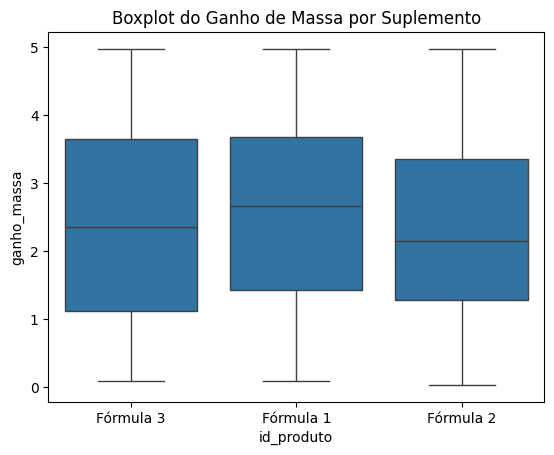

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

## Histogramas
df.hist(column='ganho_massa', by='id_produto', bins=10)
plt.suptitle('Distribuição do Ganho de Massa por Suplemento')
plt.show()

## Boxplots
sns.boxplot(x='id_produto', y='ganho_massa', data=df)
plt.title('Boxplot do Ganho de Massa por Suplemento')
plt.show()

In [ ]:
media_massa = df.groupby("id_produto")["ganho_massa"].mean()
print("Média do ganho de massa por fórmula:")
print(media_massa)

mediana_massa = df.groupby("id_produto")["ganho_massa"].median()
print("\nMediana do ganho de massa por fórmula:")
print(mediana_massa)



Média do ganho de massa por fórmula:
id_produto
Fórmula 1    2.656566
Fórmula 2    2.350106
Fórmula 3    2.393551
Name: ganho_massa, dtype: float64

Mediana do ganho de massa por fórmula:
id_produto
Fórmula 1    2.67
Fórmula 2    2.15
Fórmula 3    2.35
Name: ganho_massa, dtype: float64


In [ ]:
# sns.set(style="whitegrid")

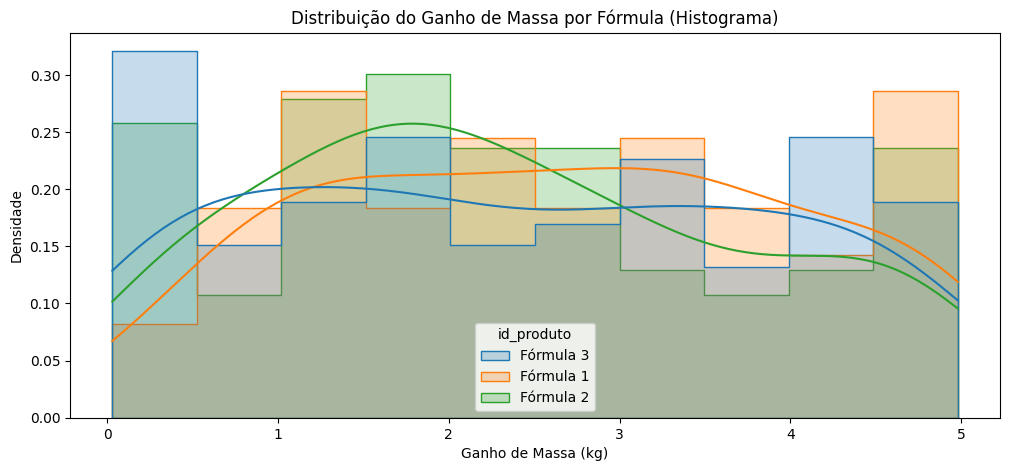

In [ ]:
plt.figure(figsize=(12, 5))
sns.histplot(data=df, x="ganho_massa", hue="id_produto", kde=True, element="step", stat="density", common_norm=False)
plt.title("Distribuição do Ganho de Massa por Fórmula (Histograma)")
plt.xlabel("Ganho de Massa (kg)")
plt.ylabel("Densidade")
plt.show()

C:\Users\Crist\AppData\Local\Temp\ipykernel_13904\2883519373.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="id_produto", y="ganho_massa", palette="pastel")


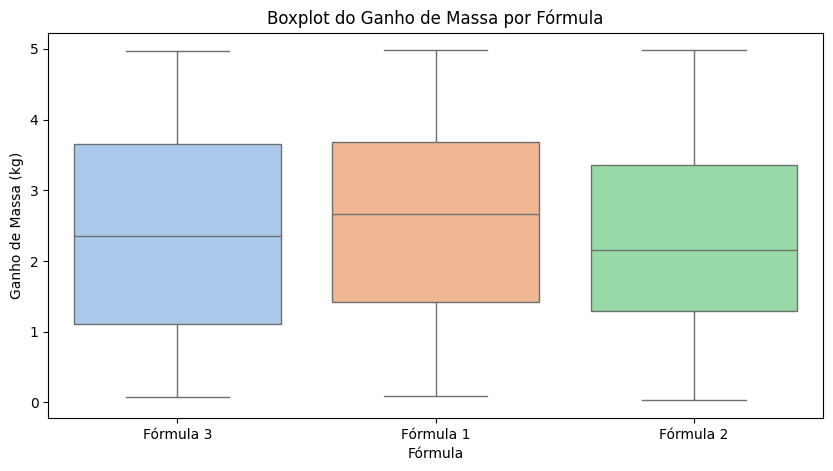

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="id_produto", y="ganho_massa", palette="pastel")
plt.title("Boxplot do Ganho de Massa por Fórmula")
plt.xlabel("Fórmula")
plt.ylabel("Ganho de Massa (kg)")
plt.show()

In [ ]:
def detectar_outliers(grupo):
    q1 = grupo.quantile(0.25)
    q3 = grupo.quantile(0.75)
    iqr = q3 - q1
    outliers = grupo[(grupo < (q1 - 1.5 * iqr)) | (grupo > (q3 + 1.5 * iqr))]
    return outliers

In [ ]:
outliers = df.groupby("id_produto")["ganho_massa"].apply(detectar_outliers)

print("\nOutliers detectados (se houver):")
print(outliers)


Outliers detectados (se houver):
Series([], Name: ganho_massa, dtype: float64)


2.  Há diferença estatisticamente significativa no ganho de massa 
muscular entre as três fórmulas? 

In [ ]:
# Importar bibliotecas necessárias
import pandas as pd
from scipy import stats

# Para o teste ANOVA, precisamos separar os dados de 'ganho_massa' para cada grupo
formula1 = df[df['id_produto'] == 'Fórmula 1']['ganho_massa']
formula2 = df[df['id_produto'] == 'Fórmula 2']['ganho_massa']
formula3 = df[df['id_produto'] == 'Fórmula 3']['ganho_massa']

# Aplicar o teste ANOVA
# stats.f_oneway realiza o teste F entre as médias de mais de dois grupos
f_stat, p_valor = stats.f_oneway(formula1, formula2, formula3)

# Exibir os resultados
print("Estatística F:", f_stat)
print("Valor-p:", p_valor)

# Interpretar o valor-p
if p_valor < 0.05:
    print("\n➡️ Resultado: Há diferença estatisticamente significativa entre as fórmulas (p < 0.05).")
else:
    print("\n➡️ Resultado: Não há diferença estatisticamente significativa entre as fórmulas (p ≥ 0.05).")


Estatística F: 1.3160813512512974
Valor-p: 0.2697435207416098

➡️ Resultado: Não há diferença estatisticamente significativa entre as fórmulas (p ≥ 0.05).


3.  Existe correlação entre idade e ganho de massa muscular? Atletas 
mais jovens ou mais velhos têm resultados diferentes? 

Correlação entre idade e ganho de massa: -0.07


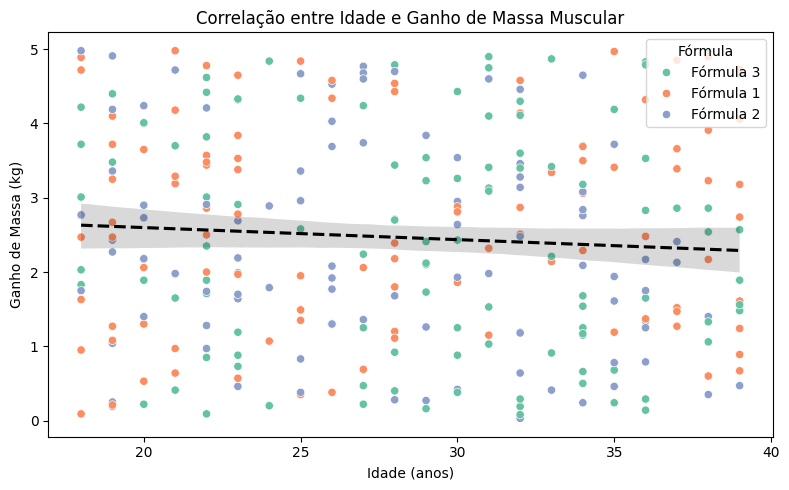

In [ ]:
# 1. Calcular a correlação entre idade e ganho de massa
correlacao = df["idade"].corr(df["ganho_massa"])
print(f"Correlação entre idade e ganho de massa: {correlacao:.2f}")

# 2. Visualizar a relação com gráfico de dispersão
plt.figure(figsize=(8, 5))  # Define o tamanho do gráfico

# Cria um scatterplot com as cores representando a fórmula usada
sns.scatterplot(data=df, x="idade", y="ganho_massa", hue="id_produto", palette="Set2")

# Adiciona uma linha de tendência para ver visualmente a correlação
sns.regplot(data=df, x="idade", y="ganho_massa", scatter=False, color="black", line_kws={"linestyle": "--"})

# Títulos e legendas
plt.title("Correlação entre Idade e Ganho de Massa Muscular")
plt.xlabel("Idade (anos)")
plt.ylabel("Ganho de Massa (kg)")
plt.legend(title="Fórmula")
plt.tight_layout()
plt.show()


4.  Atletas que treinam mais frequentemente ganham mais massa 
muscular independentemente do suplemento? 

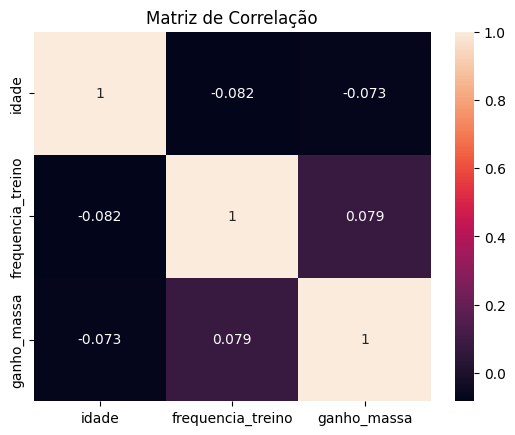

In [ ]:
correlacao_matriz = df[['idade', 'frequencia_treino', 'ganho_massa']].corr()
sns.heatmap(correlacao_matriz, annot=True)
plt.title('Matriz de Correlação')
plt.show()

In [ ]:
correlacao_frequencia = df['frequencia_treino'].corr(df['ganho_massa'])
print(f'Correlação entre frequência de treino e ganho de massa: {correlacao_frequencia}')

Correlação entre frequência de treino e ganho de massa: 0.07866306207730309


In [ ]:
df_massa = df.groupby('frequencia_treino')['ganho_massa'].mean()
df_massa

frequencia_treino
2    2.579672
3    2.161000
4    2.322540
5    2.415000
6    2.829687
Name: ganho_massa, dtype: float64

5.  Existe alguma correlação entre idade, frequência de treino e a 
eficácia do suplemento? 

In [ ]:
map_formula = {'Fórmula 1': 1,'Fórmula 2':2, 'Fórmula 3': 3}

df['formulas'] = df['id_produto'].map(map_formula)

df

,id_produto,id_atleta,ganho_massa,idade,frequencia_treino,formulas
0,Fórmula 3,1,2.24,27,5,3
1,Fórmula 1,2,4.97,35,4,1
2,Fórmula 3,3,0.88,30,6,3
3,Fórmula 3,4,0.09,22,6,3
4,Fórmula 1,5,2.47,18,6,1
...,...,...,...,...,...,...
295,Fórmula 2,296,0.38,25,2,2
296,Fórmula 2,297,4.70,28,4,2
297,Fórmula 2,298,2.08,26,4,2
298,Fórmula 2,299,2.91,22,3,2


In [ ]:
correlacao_idade = df[["idade", "frequencia_treino", "formulas"]].corr()
print(f"Correlação entre idade e ganho de massa: {correlacao_idade: }")

TypeError: unsupported format string passed to DataFrame.__format__

6.  Qual fórmula você recomendaria para atletas que treinam mais de 5 
vezes por semana? Justifique sua escolha. 

In [ ]:
atletas_frequente = df[df['frequencia_treino'] > 5]
resultado_frequentado = atletas_frequente.groupby('id_produto')['ganho_massa'].mean().reset_index()
print(resultado_frequentado)

  id_produto  ganho_massa
0  Fórmula 1     3.012609
1  Fórmula 2     2.566190
2  Fórmula 3     2.896000
